In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# Inspiration and background

Your boss was delighted to see your Jupyter notebook and the correlations you saw within the cars made between the years of 1972 to 1980. You are still a bit confused as to why you are investigating this incredibly niche market, but you go with it. Your boss confides in you that the company just bought about 100 cars from the years 1972-1980. What's more, none of them have any decals indicating the make or model of the car!

Your boss tasks you with coming up with a way this newfangled technology can help identify the country of origin of these 100 mystery cars. You have fully lost the plot at this point, but you want to make sure you keep your job, so you agree.

# Machine learning and modeling

You remember way back in college that many problems, from voice recognition to computer vision, can be solved using machine learning. You also recall a piece of advice from your computer science professor: "If you can use the simplest model, use the simplest model." Yeah! No need to overcomplicate things. Let's stick with the basics.

Decision trees are one of the most basic and efficient tools for machine learning. Think of a tree that forms branches based on delineations it finds in the data. For example, we recall that the USA manufactures incredibly fuel inefficient cars. A decision tree that is tasked to delineate between USA cars and Japanese and European cars would use this aspect, called a "feature" to make a decision. Let's read in our dataset and look at the data table.

Note: Any empty slots will be imported as NaN values (not a number) and can't be handled by the following methods. Let's drop those after importing.

In [36]:
# Read in a toy dataset that comes with Seaborn we aren't going to use the "name" column, since each car has a different name.
df = sns.load_dataset('mpg')
df = df.dropna()
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

Let's take a gander at all of the data at once! We can use the pairplot function in Seaborn to look at every column plotted against every other column in a grid. This only works for less than 10 columns, since it will get unruly to look at with higher column numbers.

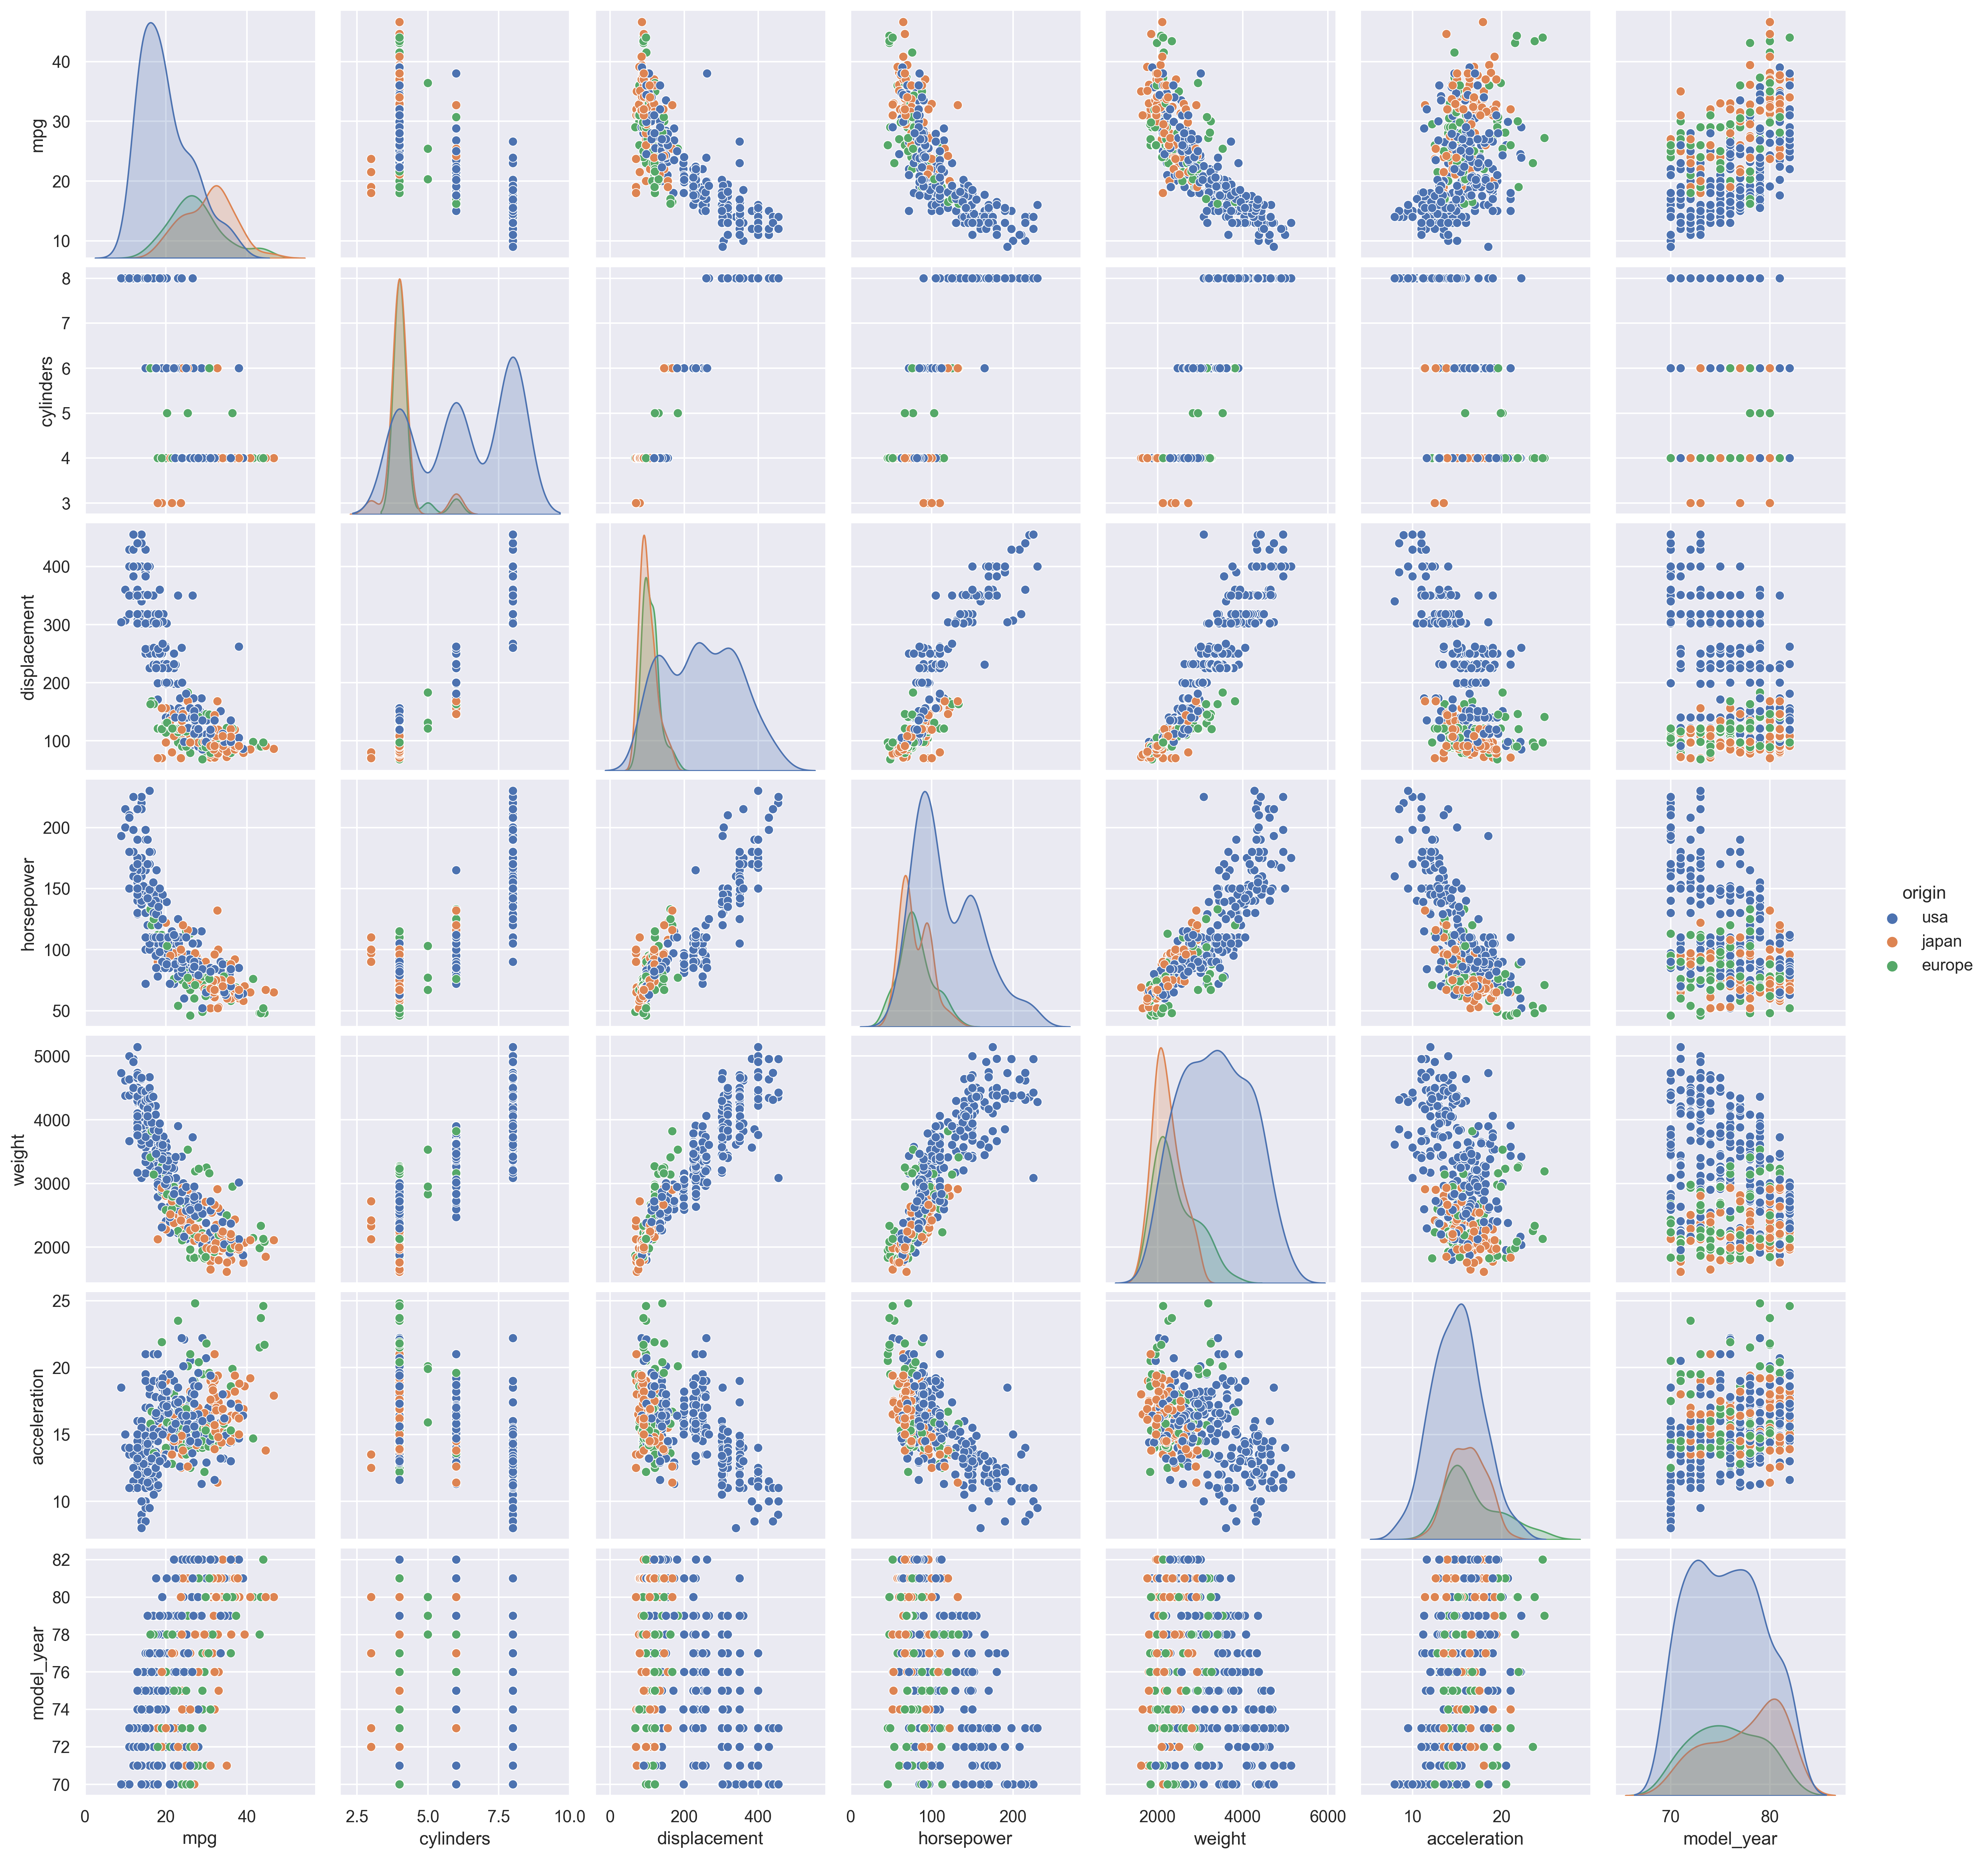

In [37]:
# Construct a pairplot of all numerical data stored in the table, and color the dots by the origin of each car.
sns.pairplot(data=df,hue='origin')
plt.show()

We aren't going to want the car names, since these will be unique and won't give us any information as to the car statistics. We can drop these columns, and store the car origin in its own dataframe for later. In order to split the data into a training set (the one we will feed into the model) and the test set (the one we will be testing our model on), we need to change the datatype from a Pandas DataFrame to a NumPy array.

In [38]:
car_origins = df.origin.to_numpy()
df_num = df.drop(['name', 'origin'], axis=1)
features = df_num.columns.to_list()
car_data = df_num.to_numpy()
print(car_data)

[[  18.     8.   307.  ... 3504.    12.    70. ]
 [  15.     8.   350.  ... 3693.    11.5   70. ]
 [  18.     8.   318.  ... 3436.    11.    70. ]
 ...
 [  32.     4.   135.  ... 2295.    11.6   82. ]
 [  28.     4.   120.  ... 2625.    18.6   82. ]
 [  31.     4.   119.  ... 2720.    19.4   82. ]]


Next, we want to set aside a set specifically for training and testing our model. To do this, we are going to use the package scikitlearn, which has a bunch of really good tools for investigating machine learning and doing robust analyses. We also want to print out one of these values to see how the data is organized.

The ratios of splitting your data into testing/training is more an art than a science. You want to make sure you're not overfitting the model (forcing it to conform to your dataset so it decreases in adaptability) or underfitting your model (not using enough training data so you're grouping outliers incorrectly). Let's start with a ratio of 33% testing, 66% training.

In [39]:
car_train, car_test, origin_train, origin_test = train_test_split(car_data, car_origins, test_size=0.33, random_state=1)
print(car_train)

[[3.600e+01 4.000e+00 1.050e+02 ... 1.980e+03 1.530e+01 8.200e+01]
 [2.390e+01 8.000e+00 2.600e+02 ... 3.420e+03 2.220e+01 7.900e+01]
 [1.500e+01 8.000e+00 3.180e+02 ... 3.777e+03 1.250e+01 7.300e+01]
 ...
 [1.300e+01 8.000e+00 3.070e+02 ... 4.098e+03 1.400e+01 7.200e+01]
 [3.050e+01 4.000e+00 9.800e+01 ... 2.051e+03 1.700e+01 7.700e+01]
 [1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 7.100e+01]]


Now that we've prepped our data for the model, let's do this thing! Below is the syntax we want to use to create and train our model. We want to first create the DecisionTreeClassifier object.

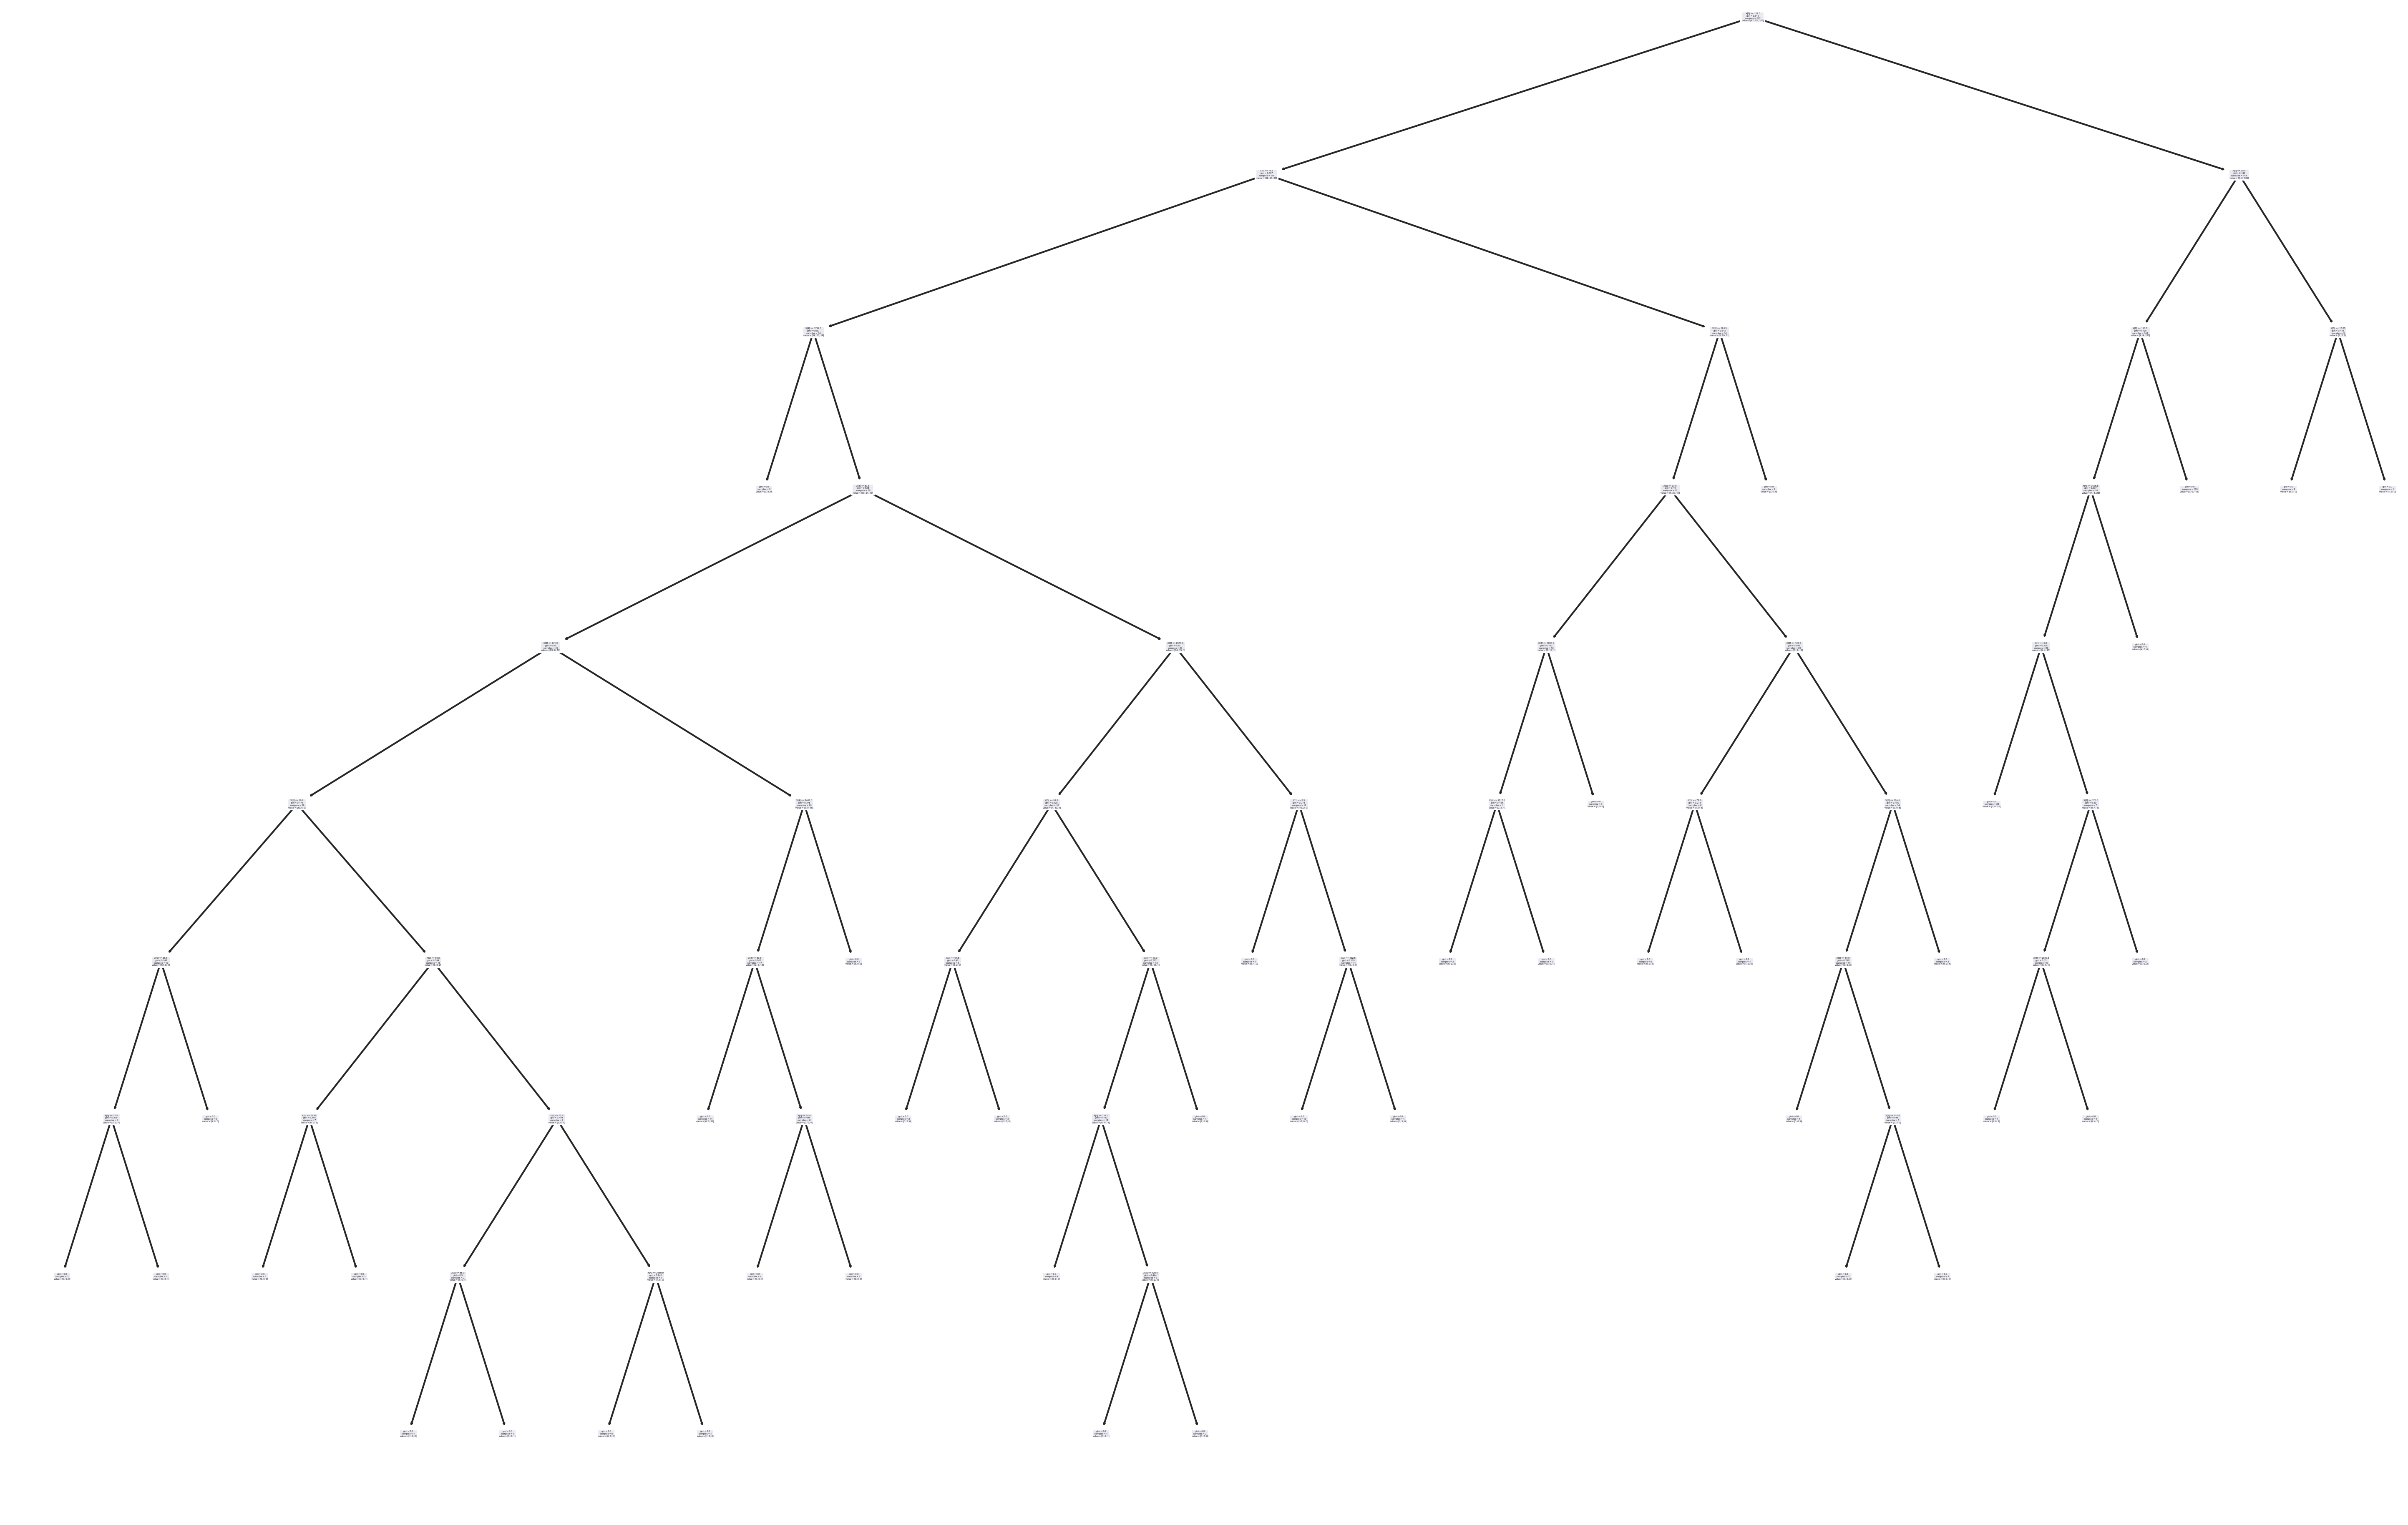

In [40]:
model = DecisionTreeClassifier(random_state=1)
model.fit(car_train, origin_train)

sns.set_context('paper')
sns.set(rc={"figure.dpi":300})

tree.plot_tree(model)
plt.show()

That tree diagram is super unhelpful. It's just a bunch of lines! Let's see how the model performed on the first pass by passing through the test cases. Using the model.score() method, we can feed in the training samples to see how our model performs.

In [41]:
print(model.score(car_test,origin_test))

0.8


The model performs completely accurately 80% of the time, which is not horrible! It's still much better than guessing based on a bunch of random numbers you're given. Let's take a look to see if we can make this model a little better.